In [1]:
import keras
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
keras.backend.backend()

'tensorflow'

In [3]:
from keras.datasets import fashion_mnist, mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


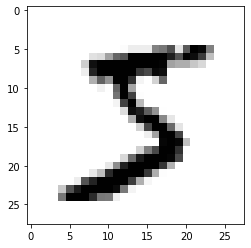

In [6]:
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [7]:
#view data color space 0-255
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
#Normalize data 
x_train = x_train/255
x_test = x_test/255

In [9]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
from keras.models import Sequential #Layer by layer
from keras.layers import Flatten, Dense

In [11]:
model = Sequential()
model.add(Flatten(input_shape=[28,28]))
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

In [13]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 10s 175us/step - loss: 0.2276 - accuracy: 0.9331
Epoch 2/5
60000/60000 [==============================] - 8s 141us/step - loss: 0.0985 - accuracy: 0.9694
Epoch 3/5
60000/60000 [==============================] - 8s 133us/step - loss: 0.0678 - accuracy: 0.9789
Epoch 4/5
60000/60000 [==============================] - 8s 132us/step - loss: 0.0519 - accuracy: 0.9835
Epoch 5/5
60000/60000 [==============================] - 7s 120us/step - loss: 0.0410 - accuracy: 0.9873


In [14]:
model.save("mnist.model")

In [15]:
_model= keras.models.load_model("mnist.model")

In [16]:
_model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 47us/step


[0.09275060015764902, 0.9746999740600586]

In [17]:
predictions = _model.predict([x_test])

In [18]:
predictions[2]

array([3.6777202e-08, 9.9986601e-01, 3.5030876e-05, 3.3936271e-06,
       7.6440110e-06, 4.2270375e-07, 6.8046920e-06, 7.0888666e-05,
       9.6693511e-06, 7.3985134e-08], dtype=float32)

In [19]:
import numpy as np

In [20]:
np.argmax(predictions[123])

6

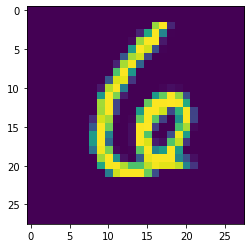

In [21]:
plt.imshow(x_test[123])